CSCE 5215 Assignment 1

Student: Thai Ha Dang - 11741833

# Question 1 (40 Points)


## 1. Load the data from the csv file provided. (3 Points)


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Load the data
df = pd.read_csv("Sale Report.csv")
print(df.shape)
df.head()



(9271, 7)


,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red


## Get statistical summary of column stock, check for missing values in each column (5 Points)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271 entries, 0 to 9270
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       9271 non-null   int64  
 1   SKU Code    9188 non-null   object 
 2   Design No.  9235 non-null   object 
 3   Stock       9235 non-null   float64
 4   Category    9226 non-null   object 
 5   Size        9235 non-null   object 
 6   Color       9226 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 507.1+ KB


In [3]:
# 2a) Statistical summary of 'Stock' column
print("Statistical summary of 'Stock':")
print(df["Stock"].describe())

# 2b) Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


Statistical summary of 'Stock':
count    9235.000000
mean       26.246454
std        58.462891
min         0.000000
25%         3.000000
50%         8.000000
75%        31.000000
max      1234.000000
Name: Stock, dtype: float64

Missing values in each column:
index          0
SKU Code      83
Design No.    36
Stock         36
Category      45
Size          36
Color         45
dtype: int64


## 3. Visualize stock availability per color using a bar chart. (10 Points)


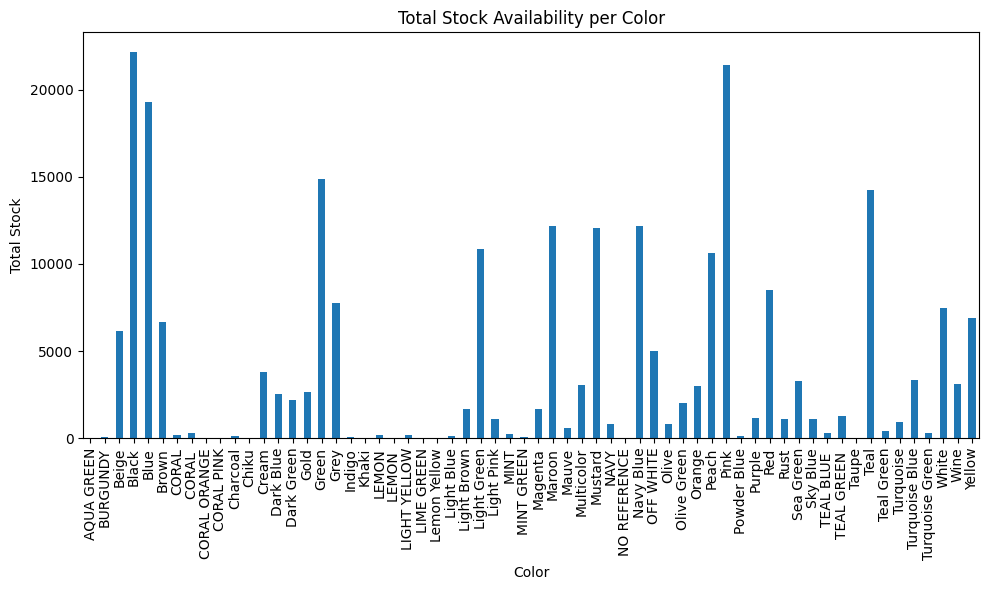

In [ ]:
# 3) Visualize total stock per color
color_stock = df.groupby("Color")["Stock"].sum()
plt.figure(figsize=(10, 6))
color_stock.plot(kind="bar")
plt.title("Total Stock Availability per Color")
plt.xlabel("Color")
plt.ylabel("Total Stock")
plt.xticks(rotation=90)  # Rotate x-axis labels for clarity
plt.tight_layout()
plt.show()


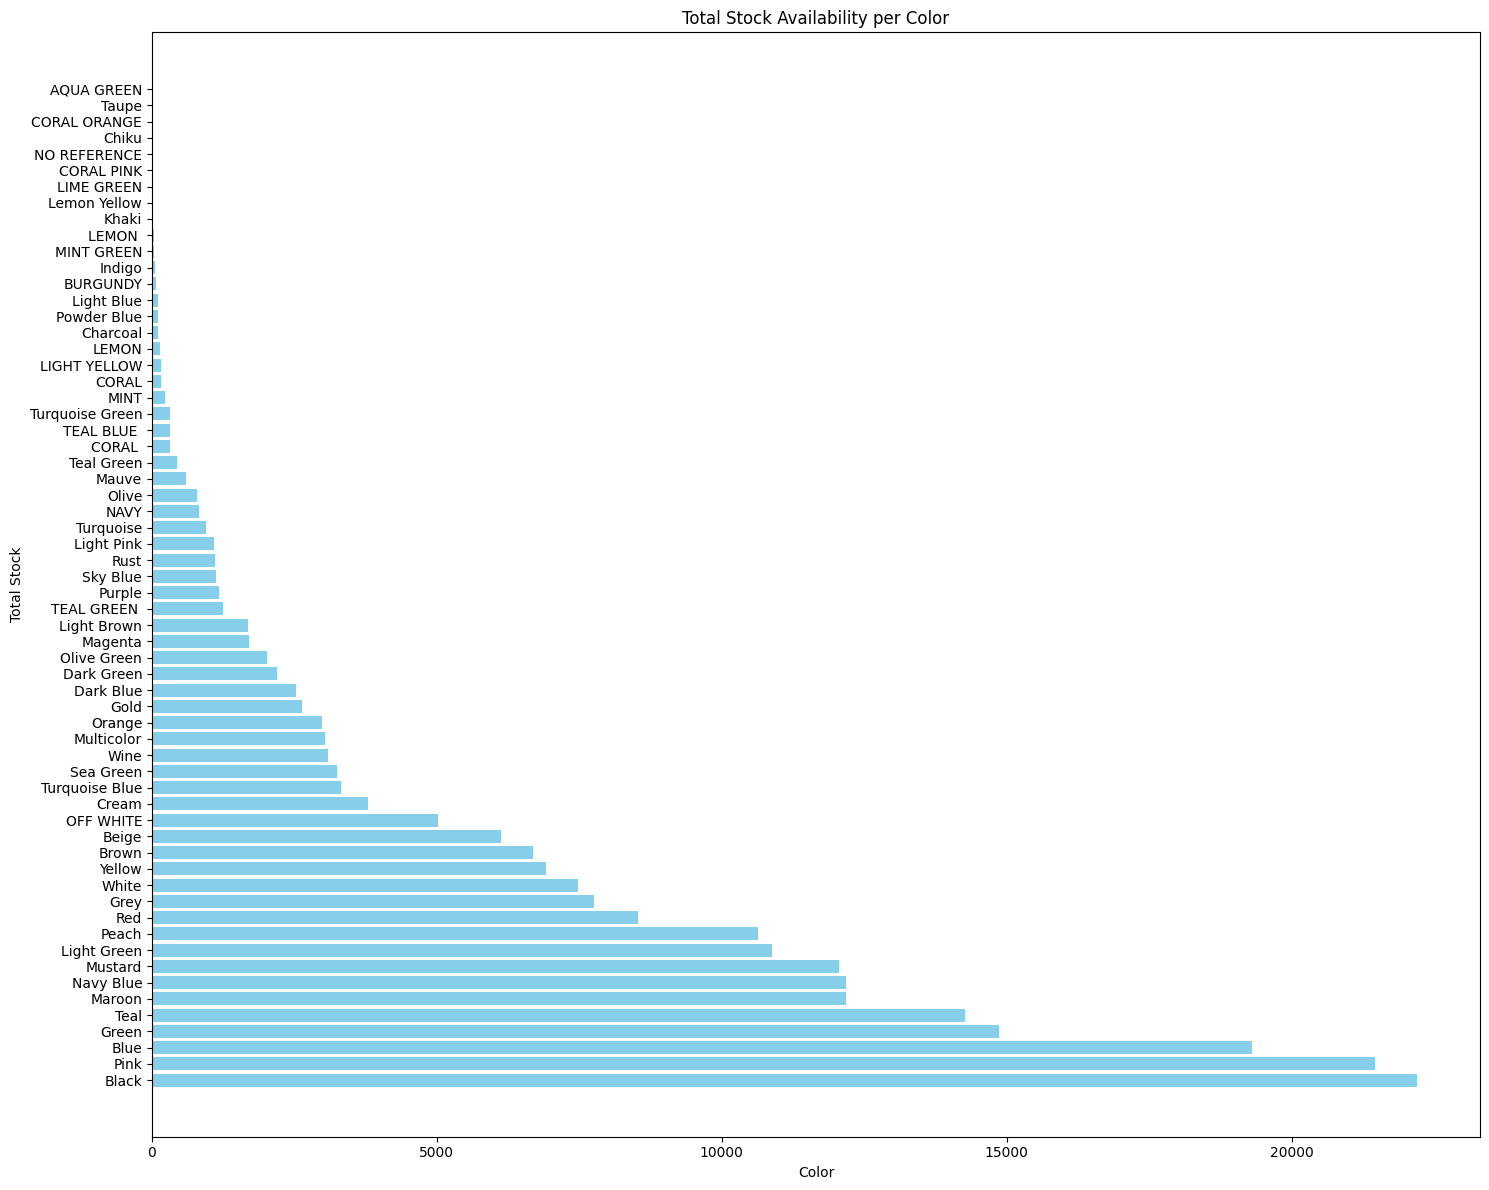

In [45]:
sorted_color_stock = color_stock.sort_values(ascending=False)
plt.figure(figsize=(15, 12))
plt.barh(sorted_color_stock.index, sorted_color_stock.values, color='skyblue')
plt.title("Total Stock Availability per Color")
plt.xlabel("Color")
plt.ylabel("Total Stock")
plt.tight_layout()
plt.show()




## 4. Add a column “Status” where “Low” if stock is less than 5, “Medium” between 5 and 10 and “High” if greater than 10. (7 Points)

In [ ]:
# define a function to categorize stock levels
def get_status(x):
    if x < 5:
        return "Low"
    elif 5 <= x <= 10:
        return "Medium"
    else:
        return "High"

df['Status'] = df['Stock'].apply(get_status)

In [9]:
df.head()

,index,SKU Code,Design No.,Stock,Category,Size,Color,Status
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red,Medium
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red,Medium
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red,Low
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red,Medium
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red,Low


## 5. Generate a pie chart to represent the distribution of status column. Retrieve all the rows where stock is “medium”. Store it into a new dataset. Display top 5 rows. (10 Points)

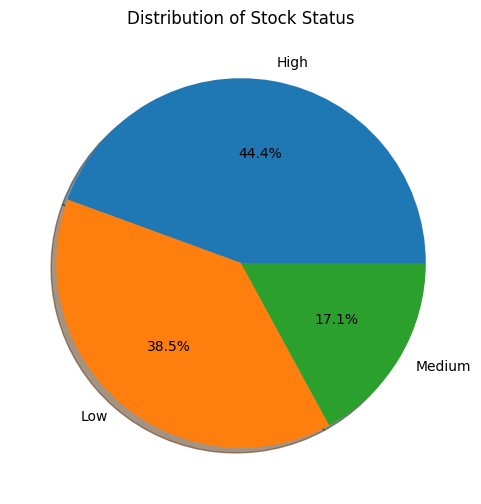


Top 5 rows where stock is 'Medium':
    index         SKU Code Design No.  Stock       Category Size   Color  \
0       0      AN201-RED-L      AN201    5.0  AN : LEGGINGS    L     Red   
1       1      AN201-RED-M      AN201    5.0  AN : LEGGINGS    M     Red   
3       3     AN201-RED-XL      AN201    6.0  AN : LEGGINGS   XL     Red   
8       8  AN202-ORANGE-XL      AN202    8.0  AN : LEGGINGS   XL  Orange   
15     15   AN204-PURPLE-L      AN204   10.0  AN : LEGGINGS    L  Purple   

    Status  
0   Medium  
1   Medium  
3   Medium  
8   Medium  
15  Medium  

Saved 'medium_stock.csv' with rows having 'Medium' stock.


In [10]:
# 5. Pie chart of Status & create subset DataFrame for 'Medium'
status_counts = df['Status'].value_counts()
plt.figure(figsize=(6, 6))
status_counts.plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Stock Status')
plt.ylabel('')
plt.show()

medium_df = df[df['Status'] == 'Medium']
print("\nTop 5 rows where stock is 'Medium':")
print(medium_df.head())

# 6. Save new dataset
medium_df.to_csv("medium_stock.csv", index=False)
print("\nSaved 'medium_stock.csv' with rows having 'Medium' stock.")


# Question 2 (30 Points)


In [ ]:
data = [
    {"Alice":   [85, 90, 88, 92]},
    {"Bob":     [78, 82, 80, 76]},
    {"Charlie": [92, 95, 96, 94]},
    {"David":   [70, 75, 72, 68]}
]
print(data)



[{'Alice': [85, 90, 88, 92]}, {'Bob': [78, 82, 80, 76]}, {'Charlie': [92, 95, 96, 94]}, {'David': [70, 75, 72, 68]}]


In [13]:
import numpy as np

# Extract scores into a 2D list, then convert to NumPy array
scores = np.array([list(d.values())[0] for d in data])
# Alternatively: scores = np.array([next(iter(d.values())) for d in data])

# Compute the average for each student (row-wise)
student_averages = np.mean(scores, axis=1)

print("NumPy array of scores:\n", scores)
print("Shape of scores:", scores.shape)
print("Average score for each student:", student_averages)


NumPy array of scores:
 [[85 90 88 92]
 [78 82 80 76]
 [92 95 96 94]
 [70 75 72 68]]
Shape of scores: (4, 4)
Average score for each student: [88.75 79.   94.25 71.25]


In [14]:
student_max = np.max(scores, axis=1)
student_min = np.min(scores, axis=1)

print("Student averages:", student_averages)
print("Student max scores:", student_max)
print("Student min scores:", student_min)


Student averages: [88.75 79.   94.25 71.25]
Student max scores: [92 82 96 75]
Student min scores: [85 76 92 68]


In [15]:
subjects = ["Math", "Science", "English", "History"]

subject_averages = np.mean(scores, axis=0)
subject_std = np.std(scores, axis=0)
highest_std_index = np.argmax(subject_std)
highest_std_subject = subjects[highest_std_index]

print("Average score for each subject:")
for subj, avg in zip(subjects, subject_averages):
    print(f"{subj}: {avg:.2f}")

print("\nStandard deviation for each subject:")
for subj, std_val in zip(subjects, subject_std):
    print(f"{subj}: {std_val:.2f}")

print(f"\nSubject with the highest standard deviation: {highest_std_subject}")


Average score for each subject:
Math: 81.25
Science: 85.50
English: 84.00
History: 82.50

Standard deviation for each subject:
Math: 8.17
Science: 7.63
English: 8.94
History: 10.90

Subject with the highest standard deviation: History


In [16]:
subject_medians = np.median(scores, axis=0)
student_medians = np.median(scores, axis=1)

print("Median scores per subject:")
for subj, med in zip(subjects, subject_medians):
    print(f"{subj}: {med}")

print("\nMedian scores per student:")
# We should print these alongside the student's name, which is in the same order as 'data'
for entry, median_val in zip(data, student_medians):
    name = list(entry.keys())[0]
    print(f"{name}: {median_val}")


Median scores per subject:
Math: 81.5
Science: 86.0
English: 84.0
History: 84.0

Median scores per student:
Alice: 89.0
Bob: 79.0
Charlie: 94.5
David: 71.0


# Question 3 (30 Points)


In [17]:
# 1. Generate random temperature data
# Shape: 12 rows (months), 10 columns (entries per month)
np.random.seed(42)  # OPTIONAL: For reproducibility
temperatures = np.random.uniform(10, 40, size=(12, 10))

print("Shape of temperature array:", temperatures.shape)
print("First 2 months sample:\n", temperatures[:2])

Shape of temperature array: (12, 10)
First 2 months sample:
 [[21.23620357 38.52142919 31.95981825 27.95975453 14.68055921 14.67983561
  11.74250837 35.98528437 28.03345035 31.24217733]
 [10.61753483 39.09729556 34.97327922 16.37017332 15.45474902 15.5021353
  19.12726729 25.74269295 22.95835056 18.73687421]]


In [18]:
monthly_averages = np.mean(temperatures, axis=1)
print("Monthly averages:\n", monthly_averages)


Monthly averages:
 [25.60410208 21.85803523 22.01161718 25.27812067 22.1367105  27.26155282
 24.02111961 23.64237488 25.73084467 23.50974537 22.35801133 28.34739548]


In [19]:
monthly_averages = np.mean(temperatures, axis=1)
print("Monthly averages:\n", monthly_averages)


Monthly averages:
 [25.60410208 21.85803523 22.01161718 25.27812067 22.1367105  27.26155282
 24.02111961 23.64237488 25.73084467 23.50974537 22.35801133 28.34739548]


In [20]:
highest_avg_idx = np.argmax(monthly_averages)
lowest_avg_idx  = np.argmin(monthly_averages)

print(f"Month with highest average temperature: Month {highest_avg_idx+1} = {monthly_averages[highest_avg_idx]:.2f}°C")
print(f"Month with lowest average temperature: Month {lowest_avg_idx+1} = {monthly_averages[lowest_avg_idx]:.2f}°C")


Month with highest average temperature: Month 12 = 28.35°C
Month with lowest average temperature: Month 2 = 21.86°C


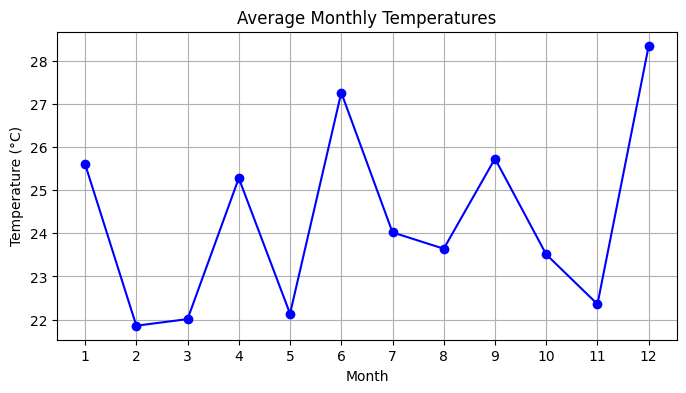

In [21]:
months = np.arange(1, 13)  # x-axis from 1 to 12
plt.figure(figsize=(8, 4))
plt.plot(months, monthly_averages, marker='o', linestyle='-', color='b')
plt.title("Average Monthly Temperatures")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.xticks(months)  # Show month numbers 1..12 on x-axis
plt.show()


In [23]:
from scipy import stats  
for i in range(12):
    month_data = temperatures[i]
    mean_val   = np.mean(month_data)
    median_val = np.median(month_data)
    mode_val   = stats.mode(month_data, keepdims=True)  # returns (mode, count)
    
    print(f"Month {i+1}:")
    print(f"   Mean:   {mean_val:.2f}°C")
    print(f"   Median: {median_val:.2f}°C")
    print(f"   Mode:   {mode_val.mode[0]:.2f}°C (appeared {mode_val.count[0]} times)")


Month 1:
   Mean:   25.60°C
   Median: 28.00°C
   Mode:   11.74°C (appeared 1 times)
Month 2:
   Mean:   21.86°C
   Median: 18.93°C
   Mode:   10.62°C (appeared 1 times)
Month 3:
   Mean:   22.01°C
   Median: 22.34°C
   Mode:   11.39°C (appeared 1 times)
Month 4:
   Mean:   25.28°C
   Median: 25.72°C
   Mode:   11.95°C (appeared 1 times)
Month 5:
   Mean:   22.14°C
   Median: 22.10°C
   Mode:   11.03°C (appeared 1 times)
Month 6:
   Mean:   27.26°C
   Median: 30.60°C
   Mode:   11.36°C (appeared 1 times)
Month 7:
   Mean:   24.02°C
   Median: 21.18°C
   Mode:   12.24°C (appeared 1 times)
Month 8:
   Mean:   23.64°C
   Median: 25.98°C
   Mode:   10.17°C (appeared 1 times)
Month 9:
   Mean:   25.73°C
   Median: 26.43°C
   Mode:   11.91°C (appeared 1 times)
Month 10:
   Mean:   23.51°C
   Median: 25.25°C
   Mode:   10.76°C (appeared 1 times)
Month 11:
   Mean:   22.36°C
   Median: 20.87°C
   Mode:   10.94°C (appeared 1 times)
Month 12:
   Mean:   28.35°C
   Median: 31.56°C
   Mode:   14.8